# APIs

Application Programming Interface

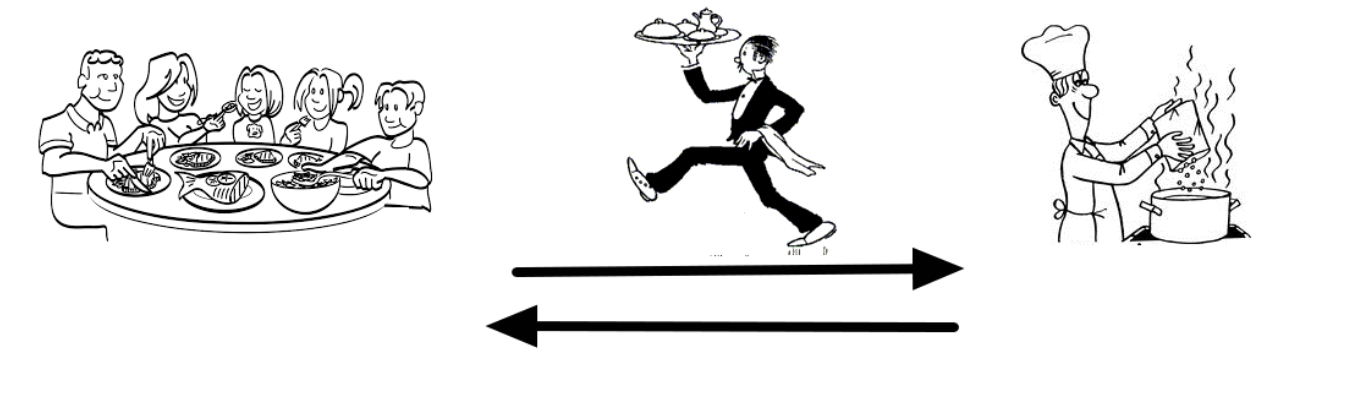

`client`: O cliente

`api`: O garçom

`o serviço (banco de dados, web application, twitter, spotify)`: O pizzaiolo

# Web APIs

## Some Examples

### API endpoints

**NASA API**: http://api.open-notify.org/
- http://api.open-notify.org/iss-now.json
    - Documentation: http://open-notify.org/Open-Notify-API/ISS-Location-Now/

**Meme API**

- http://apimeme.com/?ref=apilist.fun
- http://apimeme.com/meme?meme=Doge&top=Analista&bottom=de_Dados
    

**Public APIs**

- https://github.com/public-apis/public-apis

## Requests
* Requests is a Python HTTP library;
* The Hypertext Transfer Protocol (HTTP) is an application layer protocol for distributed, collaborative, hypermedia information systems.[1] HTTP is the foundation of data communication for the World Wide Web, where hypertext documents include hyperlinks to other resources that the user can easily access, for example by a mouse click or by tapping the screen in a web browser.[Source](https://en.wikipedia.org/wiki/Hypertext_Transfer_Protocol)

In [ ]:
! pip3 install requests

In [6]:
import requests, time

### Status Codes

In [ ]:
'http://api.open-notify.org/iss-now.json'

In [7]:
response = requests.get('http://api.open-notify.org/iss-now.json')

In [8]:
response

<Response [200]>

In [9]:
response.json()

{'iss_position': {'longitude': '144.1542', 'latitude': '-49.6490'},
 'timestamp': 1642546059,
 'message': 'success'}

In [11]:
response.text

'{"iss_position": {"longitude": "144.1542", "latitude": "-49.6490"}, "timestamp": 1642546059, "message": "success"}'

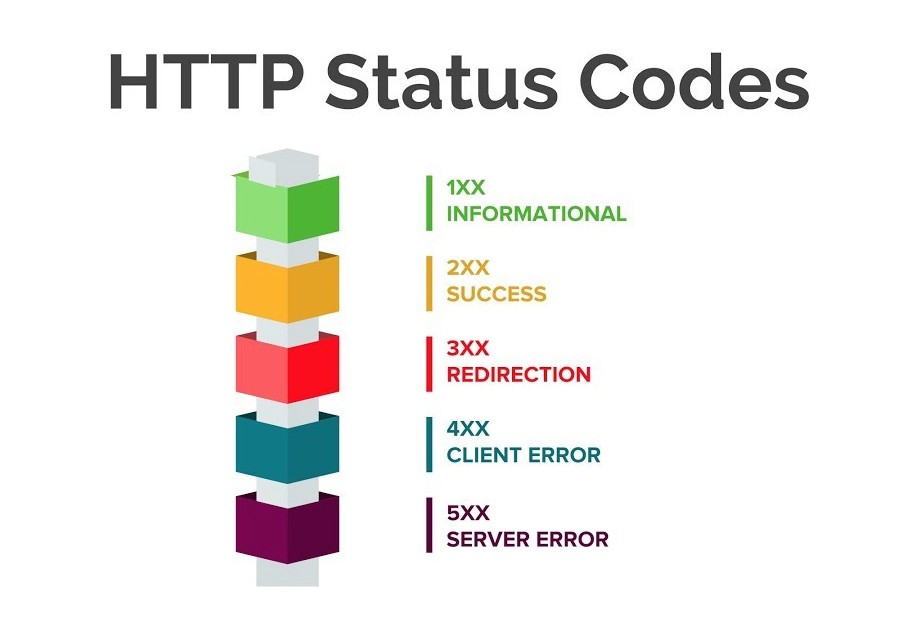

https://www.tutorialspoint.com/http/http_status_codes.htm

In [12]:
response = requests.get('http://api.open-notify.org/coisas_aleatória.json')
response

<Response [404]>

In [13]:
response.status_code

404

In [14]:
response.raise_for_status()

HTTPError: 404 Client Error: Not Found for url: http://api.open-notify.org/coisas_aleat%C3%B3ria.json

In [15]:
response = requests.get('http://api.open-notify.org/iss-now.json')
response

<Response [200]>

In [16]:
response.status_code

200

In [17]:
response.raise_for_status()

In [18]:
type(response)

requests.models.Response

In [19]:
type(response.json())

dict

In [20]:
results = response.json()
results

{'iss_position': {'longitude': '-173.6776', 'latitude': '-49.3436'},
 'timestamp': 1642546497,
 'message': 'success'}

In [21]:
results.values()

dict_values([{'longitude': '-173.6776', 'latitude': '-49.3436'}, 1642546497, 'success'])

In [22]:
results.keys()

dict_keys(['iss_position', 'timestamp', 'message'])

In [23]:
results.items()

dict_items([('iss_position', {'longitude': '-173.6776', 'latitude': '-49.3436'}), ('timestamp', 1642546497), ('message', 'success')])

In [31]:
results['iss_position']['longitude']

'-173.6776'

In [26]:
float(results['iss_position']['longitude'])

-173.6776

In [27]:
lat, long = results['iss_position']['latitude'], results['iss_position']['longitude']

In [28]:
lat

'-49.3436'

In [29]:
long

'-173.6776'

## The usual workflow

### Flow 1: ISS Now

In [32]:
# transform timestamp to datetime
from datetime import datetime
import pandas as pd

response = requests.get('http://api.open-notify.org/iss-now.json')
results = response.json()

In [33]:
results

{'iss_position': {'longitude': '-145.7119', 'latitude': '-37.6593'},
 'timestamp': 1642546872,
 'message': 'success'}

In [34]:
data_hora = datetime.fromtimestamp(results['timestamp'])
print(data_hora)

2022-01-18 20:01:12


In [35]:
# get results during 1 minute
lat = []
long = []
data_hora = []

for i in range(6):
    response = requests.get('http://api.open-notify.org/iss-now.json')
    results = response.json()
    lat.append(float(results['iss_position']['latitude']))
    long.append(float(results['iss_position']['longitude']))
    data_hora.append(datetime.fromtimestamp(results['timestamp']))
    time.sleep(10)

In [36]:
for i in data_hora: print(i)

2022-01-18 20:05:59
2022-01-18 20:06:09
2022-01-18 20:06:19
2022-01-18 20:06:30
2022-01-18 20:06:40
2022-01-18 20:06:51


In [37]:
df = pd.DataFrame({'lat': lat, 'long':long, 'time':data_hora})

In [38]:
df

,lat,long,time
0,-25.0370,-130.9648,2022-01-18 20:05:59
1,-24.5649,-130.5199,2022-01-18 20:06:09
2,-24.0676,-130.0566,2022-01-18 20:06:19
3,-23.5686,-129.5972,2022-01-18 20:06:30
4,-23.0680,-129.1416,2022-01-18 20:06:40
5,-22.5658,-128.6898,2022-01-18 20:06:51


In [ ]:

while True:
    response = requests.get('http://api.open-notify.org/iss-now.json')
    results = response.json()
    lat.append(float(results['iss_position']['latitude']))
    long.append(float(results['iss_position']['longitude']))
    data_hora.append(datetime.fromtimestamp(results['timestamp']))
    time.sleep(10)

### Flow 2: WeatherAPI

In [45]:
# Pegar localização da sua casa através do maps e analisar resultados 

token = 'bfef1b47e3b8462199b191725221801'
endpoint = 'http://api.weatherapi.com/v1/current.json'

header = {'key' : token}
query = {'q' : '-21.996160,-47.426420'}

response = requests.request('GET', endpoint, headers=header, params=query)
results = response.json()

In [46]:
results

{'location': {'name': 'Piracununga',
  'region': 'Sao Paulo',
  'country': 'Brazil',
  'lat': -22.0,
  'lon': -47.43,
  'tz_id': 'America/Sao_Paulo',
  'localtime_epoch': 1642548347,
  'localtime': '2022-01-18 20:25'},
 'current': {'last_updated_epoch': 1642547700,
  'last_updated': '2022-01-18 20:15',
  'temp_c': 25.0,
  'temp_f': 77.0,
  'is_day': 0,
  'condition': {'text': 'Partly cloudy',
   'icon': '//cdn.weatherapi.com/weather/64x64/night/116.png',
   'code': 1003},
  'wind_mph': 5.6,
  'wind_kph': 9.0,
  'wind_degree': 280,
  'wind_dir': 'W',
  'pressure_mb': 1017.0,
  'pressure_in': 30.03,
  'precip_mm': 1.7,
  'precip_in': 0.07,
  'humidity': 79,
  'cloud': 50,
  'feelslike_c': 27.0,
  'feelslike_f': 80.6,
  'vis_km': 10.0,
  'vis_miles': 6.0,
  'uv': 1.0,
  'gust_mph': 5.1,
  'gust_kph': 8.3}}

In [ ]:
print(datetime.fromtimestamp(results['location']['localtime_epoch']))

In [44]:
results['current'].keys()

dict_keys(['last_updated_epoch', 'last_updated', 'temp_c', 'temp_f', 'is_day', 'condition', 'wind_mph', 'wind_kph', 'wind_degree', 'wind_dir', 'pressure_mb', 'pressure_in', 'precip_mm', 'precip_in', 'humidity', 'cloud', 'feelslike_c', 'feelslike_f', 'vis_km', 'vis_miles', 'uv', 'gust_mph', 'gust_kph'])

## Handling json files

- json_normalize

In [ ]:
# Verificar variável response.json()
token = 'bfef1b47e3b8462199b191725221801'

endpoint = 'http://api.weatherapi.com/v1/current.json'
header = {'key' : token}
query = {'q' : '-21.99,-47.42'}


response = requests.request('GET', endpoint, headers=header, params=query)
results = response.json()

In [ ]:

'''
https://api.twitter.com/2/users/by?usernames=TwitterDev,Twitter -H "Authorization: Bearer $ACCESS_TOKEN,UserSecret: $USER_SECRET"


ENDPOINT É https://api.twitter.com/2/users/by
CADA ENDPOINT É UMA FONTE (UMA API PODE TER MULTIPLOS ENDPOINTS https://api.twitter.com/2/tweet/searchAll, etc)

HEADER É    -H "Authorization: Bearer $ACCESS_TOKEN"
    "Authorization" 
    header = {"Authorization" : f"Bearer {ACCESS_TOKEN}"}
    
PARAMS SÃO ?usernames=TwitterDev,Twitter 
    

'''

In [ ]:
endpoint = 'https://api.twitter.com/2/users/by'

ACCESS_TOKEN = os.getenv('PEDROS_TOKEN')

curl "https://api.twitter.com/2/tweets?ids=1261326399320715264,1278347468690915330" -H "Authorization: Bearer $ACCESS_TOKEN"

"https://api.twitter.com/2/tweets"

"ids=1261326399320715264,1278347468690915330"

query = dict()

query['id'] = "1261326399320715264,1278347468690915330"

#-H "Authorization: Bearer $ACCESS_TOKEN,UserSecret: $USER_SECRET"

header = {"Authorization" : f"Bearer {ACCESS_TOKEN}",
          "UserSecret" ; USER_SECRET}

query = {'usernames' : 'larabertini'}

response = requests.request('GET', 
                            url=endpoint, 
                            headers=header, 
                            params=query)

In [47]:
lista_latlong = [
    '-23.57,-46.69', 
    '-1.34,-48.60', 
    '-7.99,-34.87', 
    '6.51,3.39',
    '33.69,-84.44', 
    '69.00, 33.13'
]

In [48]:
token = 'bfef1b47e3b8462199b191725221801'
endpoint = 'http://api.weatherapi.com/v1/current.json'
header = {'key' : token}
lista_resultados = []
for latlong in lista_latlong:
    query = {'q' : latlong}
    response = requests.request('GET', endpoint, headers=header, params=query)
    results = response.json()
    lista_resultados.append(results)

In [ ]:
lista_latlong = [
    '-23.57,-46.69', 
    '-1.34,-48.60', 
    '-7.99,-34.87', 
    '6.51,3.39',
    '33.69,-84.44', 
    '69.00, 33.13'
]



token = 'bfef1b47e3b8462199b191725221801'
endpoint = 'http://api.weatherapi.com/v1/current.json'
header = {'key' : token}
endpoint = 'https://api.etherscan.io/api'
query = {'module': 'account', 'action':'balancemulti'}
resultados = []
for lat_long in lista_latlong:
    query = {'q' : lat_long}
    response = requests.request('GET', endpoint, headers=header, params=query)
    resultados.append(response.json())

In [ ]:
'''
https://deep-index.moralis.io/api/v2/0xaddress/nft?chain=eth&format=decimal 
-H accept: application/json 
-H X-API-Key: YOUR_API_KEY'
'''
endpoint = 'https://deep-index.moralis.io/api/v2/0xaddress/nft'
query = {'chain':'eth', 'format':'decimal'}
header = {'accept' : 'application/json', 'X-API-Key' : '<YOUR_API_KEY>'}

response = requests.request('GET', endpoint, headers=header, params=query)

In [51]:
lista_resultados[0]

{'location': {'name': 'Lapa',
  'region': 'Sao Paulo',
  'country': 'Brazil',
  'lat': -23.57,
  'lon': -46.69,
  'tz_id': 'America/Sao_Paulo',
  'localtime_epoch': 1642548938,
  'localtime': '2022-01-18 20:35'},
 'current': {'last_updated_epoch': 1642548600,
  'last_updated': '2022-01-18 20:30',
  'temp_c': 21.0,
  'temp_f': 69.8,
  'is_day': 0,
  'condition': {'text': 'Partly cloudy',
   'icon': '//cdn.weatherapi.com/weather/64x64/night/116.png',
   'code': 1003},
  'wind_mph': 5.6,
  'wind_kph': 9.0,
  'wind_degree': 240,
  'wind_dir': 'WSW',
  'pressure_mb': 1018.0,
  'pressure_in': 30.06,
  'precip_mm': 0.9,
  'precip_in': 0.04,
  'humidity': 88,
  'cloud': 75,
  'feelslike_c': 21.0,
  'feelslike_f': 69.8,
  'vis_km': 10.0,
  'vis_miles': 6.0,
  'uv': 1.0,
  'gust_mph': 6.0,
  'gust_kph': 9.7}}

In [56]:
df_1 = pd.json_normalize(lista_resultados)

In [57]:
df_1

,location.name,location.region,location.country,location.lat,location.lon,location.tz_id,location.localtime_epoch,location.localtime,current.last_updated_epoch,current.last_updated,...,current.precip_in,current.humidity,current.cloud,current.feelslike_c,current.feelslike_f,current.vis_km,current.vis_miles,current.uv,current.gust_mph,current.gust_kph
0,Lapa,Sao Paulo,Brazil,-23.57,-46.69,America/Sao_Paulo,1642548938,2022-01-18 20:35,1642548600,2022-01-18 20:30,...,0.04,88,75,21.0,69.8,10.0,6.0,1.0,6.0,9.7
1,Pocao,Para,Brazil,-1.34,-48.60,America/Belem,1642548939,2022-01-18 20:35,1642548600,2022-01-18 20:30,...,0.01,94,75,25.4,77.7,10.0,6.0,1.0,5.1,8.3
2,Olinda,Pernambuco,Brazil,-7.99,-34.87,America/Noronha,1642548939,2022-01-18 21:35,1642548600,2022-01-18 21:30,...,0.00,70,50,31.1,88.0,10.0,6.0,1.0,15.2,24.5
3,Tatala,Lagos,Nigeria,6.51,3.39,Africa/Lagos,1642548939,2022-01-19 0:35,1642548600,2022-01-19 00:30,...,0.00,79,0,29.0,84.2,10.0,6.0,1.0,7.4,11.9
4,East Point,Georgia,United States of America,33.69,-84.44,America/New_York,1642548940,2022-01-18 18:35,1642548600,2022-01-18 18:30,...,0.00,38,0,10.5,51.0,16.0,9.0,4.0,3.4,5.4
5,Rosta,Murmansk,Russia,69.00,33.13,Europe/Moscow,1642548940,2022-01-19 2:35,1642548600,2022-01-19 02:30,...,0.00,86,37,-11.6,11.0,9.0,5.0,1.0,21.7,34.9


In [58]:
df_1.columns

Index(['location.name', 'location.region', 'location.country', 'location.lat',
       'location.lon', 'location.tz_id', 'location.localtime_epoch',
       'location.localtime', 'current.last_updated_epoch',
       'current.last_updated', 'current.temp_c', 'current.temp_f',
       'current.is_day', 'current.condition.text', 'current.condition.icon',
       'current.condition.code', 'current.wind_mph', 'current.wind_kph',
       'current.wind_degree', 'current.wind_dir', 'current.pressure_mb',
       'current.pressure_in', 'current.precip_mm', 'current.precip_in',
       'current.humidity', 'current.cloud', 'current.feelslike_c',
       'current.feelslike_f', 'current.vis_km', 'current.vis_miles',
       'current.uv', 'current.gust_mph', 'current.gust_kph'],
      dtype='object')

In [59]:
df_1.describe()

,location.lat,location.lon,location.localtime_epoch,current.last_updated_epoch,current.temp_c,current.temp_f,current.is_day,current.condition.code,current.wind_mph,current.wind_kph,...,current.precip_in,current.humidity,current.cloud,current.feelslike_c,current.feelslike_f,current.vis_km,current.vis_miles,current.uv,current.gust_mph,current.gust_kph
count,6.000000,6.000000,6.000000e+00,6.000000e+00,6.000000,6.000000,6.0,6.000000,6.000000,6.000000,...,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
mean,12.716667,-29.680000,1.642549e+09,1.642549e+09,17.433333,63.383333,0.0,1037.000000,4.883333,7.866667,...,0.008333,75.833333,39.500000,17.566667,63.616667,10.833333,6.333333,1.500000,9.800000,15.783333
std,33.434399,41.741158,7.527727e-01,0.000000e+00,12.624051,22.721128,0.0,86.234564,2.582570,4.190784,...,0.016021,20.282176,33.933759,16.047762,28.922269,2.562551,1.366260,1.224745,7.127692,11.465848
min,-23.570000,-84.440000,1.642549e+09,1.642549e+09,-5.000000,23.000000,0.0,1000.000000,0.000000,0.000000,...,0.000000,38.000000,0.000000,-11.600000,11.000000,9.000000,5.000000,1.000000,3.400000,5.400000
25%,-6.327500,-48.122500,1.642549e+09,1.642549e+09,13.200000,55.775000,0.0,1000.750000,4.625000,7.350000,...,0.000000,72.250000,9.250000,13.125000,55.700000,10.000000,6.000000,1.000000,5.325000,8.650000
50%,2.585000,-40.780000,1.642549e+09,1.642549e+09,22.000000,71.600000,0.0,1003.000000,5.600000,9.000000,...,0.000000,82.500000,43.500000,23.200000,73.750000,10.000000,6.000000,1.000000,6.700000,10.800000
75%,26.895000,-6.175000,1.642549e+09,1.642549e+09,26.000000,78.800000,0.0,1003.000000,6.575000,10.650000,...,0.007500,87.500000,68.750000,28.100000,82.575000,10.000000,6.000000,1.000000,13.250000,21.350000
max,69.000000,33.130000,1.642549e+09,1.642549e+09,28.000000,82.400000,0.0,1213.000000,6.900000,11.200000,...,0.040000,94.000000,75.000000,31.100000,88.000000,16.000000,9.000000,4.000000,21.700000,34.900000


## Create functions to wrap up the functionality of these endpoints

In [60]:
def clima_atual(lat, long):
    token = 'bfef1b47e3b8462199b191725221801'
    endpoint = 'http://api.weatherapi.com/v1/current.json'
    header = {'key' : token}
    query = {'q' : str(lat) + ',' + str(long)}
    response = requests.request('GET', endpoint, headers=header, params=query)
    return response.json()

In [61]:
clima_atual(-40, -30)

{'location': {'name': '30 Decembrie',
  'region': 'Vaslui',
  'country': 'Romania',
  'lat': 46.33,
  'lon': 27.85,
  'tz_id': 'Europe/Bucharest',
  'localtime_epoch': 1642549742,
  'localtime': '2022-01-19 1:49'},
 'current': {'last_updated_epoch': 1642548600,
  'last_updated': '2022-01-19 01:30',
  'temp_c': -2.1,
  'temp_f': 28.2,
  'is_day': 0,
  'condition': {'text': 'Patchy snow possible',
   'icon': '//cdn.weatherapi.com/weather/64x64/night/179.png',
   'code': 1066},
  'wind_mph': 19.7,
  'wind_kph': 31.7,
  'wind_degree': 337,
  'wind_dir': 'NNW',
  'pressure_mb': 1028.0,
  'pressure_in': 30.36,
  'precip_mm': 0.0,
  'precip_in': 0.0,
  'humidity': 58,
  'cloud': 20,
  'feelslike_c': -9.4,
  'feelslike_f': 15.1,
  'vis_km': 9.0,
  'vis_miles': 5.0,
  'uv': 1.0,
  'gust_mph': 32.9,
  'gust_kph': 52.9}}

In [62]:
lista_latlong = [
    (-23.57,-46.69), 
    (-1.34,-48.60), 
    (-7.99,-34.87), 
    (6.51,3.39),
    (33.69,-84.44), 
    (69.00, 33.13)
]

In [63]:
[clima_atual(lat, long) for lat, long in lista_latlong]

[{'location': {'name': 'Lapa',
   'region': 'Sao Paulo',
   'country': 'Brazil',
   'lat': -23.57,
   'lon': -46.69,
   'tz_id': 'America/Sao_Paulo',
   'localtime_epoch': 1642549807,
   'localtime': '2022-01-18 20:50'},
  'current': {'last_updated_epoch': 1642548600,
   'last_updated': '2022-01-18 20:30',
   'temp_c': 21.0,
   'temp_f': 69.8,
   'is_day': 0,
   'condition': {'text': 'Partly cloudy',
    'icon': '//cdn.weatherapi.com/weather/64x64/night/116.png',
    'code': 1003},
   'wind_mph': 5.6,
   'wind_kph': 9.0,
   'wind_degree': 240,
   'wind_dir': 'WSW',
   'pressure_mb': 1018.0,
   'pressure_in': 30.06,
   'precip_mm': 0.9,
   'precip_in': 0.04,
   'humidity': 88,
   'cloud': 75,
   'feelslike_c': 21.0,
   'feelslike_f': 69.8,
   'vis_km': 10.0,
   'vis_miles': 6.0,
   'uv': 1.0,
   'gust_mph': 6.0,
   'gust_kph': 9.7}},
 {'location': {'name': 'Pocao',
   'region': 'Para',
   'country': 'Brazil',
   'lat': -1.34,
   'lon': -48.6,
   'tz_id': 'America/Belem',
   'localtime_e

In [ ]:
clima_atual(-23.55359356688248, -46.657746179882906)

In [64]:
def astronomia_hoje(lat, long):
    token = 'bfef1b47e3b8462199b191725221801'
    endpoint = 'http://api.weatherapi.com/v1/astronomy.json'
    header = {'key' : token}
    query = {'q' : str(lat) + ',' + str(long)}
    response = requests.request('GET', endpoint, headers=header, params=query)
    return response.json()

In [65]:
astronomia_hoje(-23, -46)

{'location': {'name': 'Sao Francisco Xavier',
  'region': 'Sao Paulo',
  'country': 'Brazil',
  'lat': -23.0,
  'lon': -46.0,
  'tz_id': 'America/Sao_Paulo',
  'localtime_epoch': 1642549925,
  'localtime': '2022-01-18 20:52'},
 'astronomy': {'astro': {'sunrise': '05:34 AM',
   'sunset': '06:55 PM',
   'moonrise': '07:45 PM',
   'moonset': '05:52 AM',
   'moon_phase': 'Full Moon',
   'moon_illumination': '95'}}}

In [66]:
class WeatherAPI:
    def __init__(self, token):
        print('Criando uma interface para os endpoints da WeatherAPI (www.weatherapi.com)')
        self.token = token
    
    def clima_atual(self, lat, long):
        endpoint = 'http://api.weatherapi.com/v1/current.json'
        header = {'key' : self.token}
        query = {'q' : str(lat) + ',' + str(long)}
        response = requests.request('GET', endpoint, headers=header, params=query)
        return response.json()
    
    def astronomia_hoje(self, lat, long):
        endpoint = 'http://api.weatherapi.com/v1/astronomy.json'
        header = {'key' : self.token}
        query = {'q' : str(lat) + ',' + str(long)}
        response = requests.request('GET', endpoint, headers=header, params=query)
        return response.json()

In [67]:
token = 'bfef1b47e3b8462199b191725221801'
w_api = WeatherAPI(token)

Criando uma interface para os endpoints da WeatherAPI (www.weatherapi.com)


# Voltamos 21h15

In [68]:
w_api.token

'bfef1b47e3b8462199b191725221801'

In [69]:
w_api.astronomia_hoje(28, 43)

{'location': {'name': 'Al Mayyah',
  'region': 'Al Hudud ash Shamaliyah',
  'country': 'Saudi Arabia',
  'lat': 28.0,
  'lon': 43.0,
  'tz_id': 'Asia/Riyadh',
  'localtime_epoch': 1642550205,
  'localtime': '2022-01-19 2:56'},
 'astronomy': {'astro': {'sunrise': '07:00 AM',
   'sunset': '05:37 PM',
   'moonrise': '06:00 PM',
   'moonset': '07:27 AM',
   'moon_phase': 'Full Moon',
   'moon_illumination': '95'}}}

What we have just done is an `API wrapper`.